In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [188]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [189]:
df_train.shape, df_test.shape

((614, 13), (367, 12))

In [190]:
df = pd. concat([df_train, df_test],ignore_index=True)

In [191]:
df.shape

(981, 13)

In [192]:
df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [193]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [194]:
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1,'N':0})
df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})
df['Self_Employed'] = df['Self_Employed'].replace({'Yes':1,'No':0})
df['Education'] = df['Education'].replace({'Graduate':1,'Not':0,'Not Graduate':0})
df['Married'] = df['Married'].replace({'Yes':1,'No':0})
df['Dependents'] = df['Dependents'].replace({'3+': 3})
df['Property_Area'] = df['Property_Area'].replace({'Urban': 1,'Rural':0,'Semiurban':2})

In [195]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [196]:
df.isnull().count()

Loan_ID              981
Gender               981
Married              981
Dependents           981
Education            981
Self_Employed        981
ApplicantIncome      981
CoapplicantIncome    981
LoanAmount           981
Loan_Amount_Term     981
Credit_History       981
Property_Area        981
Loan_Status          981
dtype: int64

In [197]:
df.head(100)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1.0
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0.0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1.0
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1.0
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LP001326,1.0,0.0,0,1,NaN,6782,0.0,NaN,360.0,NaN,1,0.0
96,LP001327,0.0,1.0,0,1,0.0,2484,2302.0,137.0,360.0,1.0,2,1.0
97,LP001333,1.0,1.0,0,1,0.0,1977,997.0,50.0,360.0,1.0,2,1.0
98,LP001334,1.0,1.0,0,0,0.0,4188,0.0,115.0,180.0,1.0,2,1.0


In [198]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,957.000000,978.000000,981.000000,926.000000,981.000000,981.000000,954.000000,961.000000,902.000000,981.000000,614.000000
mean,0.809822,0.645194,0.777778,0.128510,5179.795107,1601.916330,142.511530,342.201873,0.835920,1.060143,0.687296
std,0.392646,0.478699,0.415952,0.334837,5695.104533,2718.772806,77.421743,65.100602,0.370553,0.805245,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,6.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2875.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3800.000000,1110.000000,126.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5516.000000,2365.000000,162.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    float64
 2   Married            978 non-null    float64
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    int64  
 5   Self_Employed      926 non-null    float64
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    int64  
 12  Loan_Status        614 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 99.8+ KB


# Missing values

In [200]:
df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [201]:
df['Gender'] = df['Gender'].fillna(-999)
df['Dependents'] = df['Dependents'].fillna(-999)
df['Self_Employed'] = df['Self_Employed'].fillna(-999)
df['LoanAmount'] = df['LoanAmount'].fillna(-999)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(-999)
df['Credit_History'] = df['Credit_History'].fillna(-999)
df['Married'] = df['Married'].fillna(-999)

In [202]:
df.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    float64
 2   Married            981 non-null    float64
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    int64  
 5   Self_Employed      981 non-null    float64
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    int64  
 12  Loan_Status        614 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 99.8+ KB


# Exploratory Data Analysis

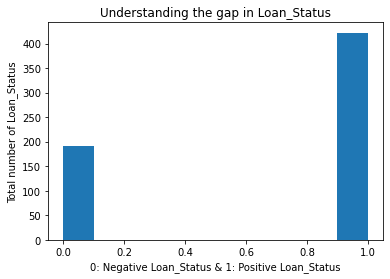

In [204]:
plt.hist(df['Loan_Status'])
plt.title('Understanding the gap in Loan_Status')
plt.xlabel('0: Negative Loan_Status & 1: Positive Loan_Status')
plt.ylabel('Total number of Loan_Status')
plt.show()


<AxesSubplot:xlabel='Married', ylabel='Loan_Status'>

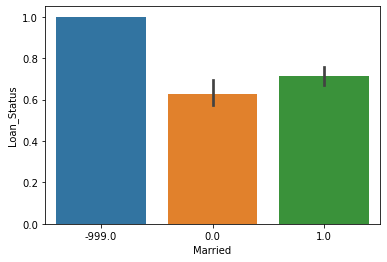

In [205]:
sns.barplot(x='Married', y='Loan_Status', data=df)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

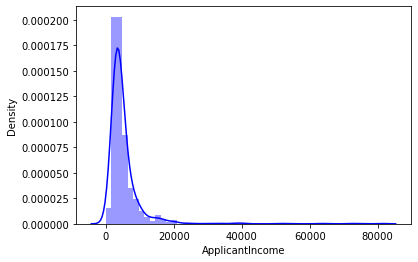

In [206]:
sns.distplot(df['ApplicantIncome'], color = 'blue')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

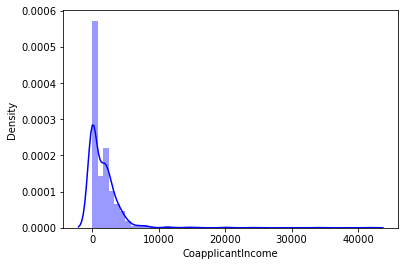

In [207]:
sns.distplot(df['CoapplicantIncome'], color = 'blue')

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

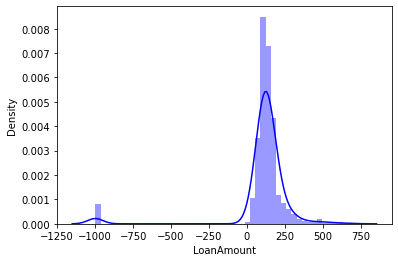

In [208]:
sns.distplot(df['LoanAmount'], color = 'blue')

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

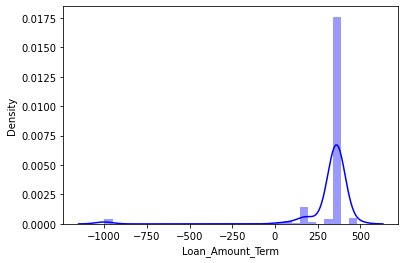

In [209]:
sns.distplot(df['Loan_Amount_Term'], color = 'blue')

In [210]:
df.head(100)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,-999.0,360.0,1.0,1,1.0
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0.0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1.0
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1.0
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LP001326,1.0,0.0,0,1,-999.0,6782,0.0,-999.0,360.0,-999.0,1,0.0
96,LP001327,0.0,1.0,0,1,0.0,2484,2302.0,137.0,360.0,1.0,2,1.0
97,LP001333,1.0,1.0,0,1,0.0,1977,997.0,50.0,360.0,1.0,2,1.0
98,LP001334,1.0,1.0,0,0,0.0,4188,0.0,115.0,180.0,1.0,2,1.0


<AxesSubplot:xlabel='Gender', ylabel='count'>

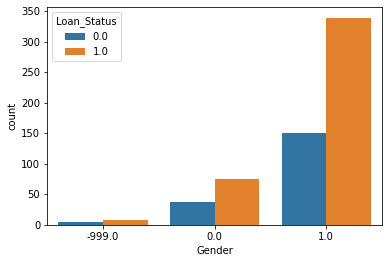

In [211]:
sns.countplot(df['Gender'],hue = df['Loan_Status'])

<AxesSubplot:xlabel='Married', ylabel='count'>

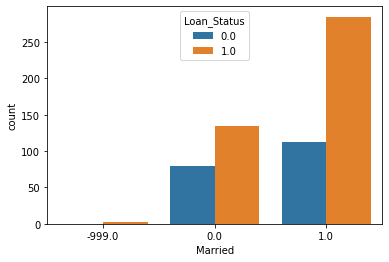

In [212]:
sns.countplot(df['Married'],hue = df['Loan_Status'])

<AxesSubplot:xlabel='Married', ylabel='count'>

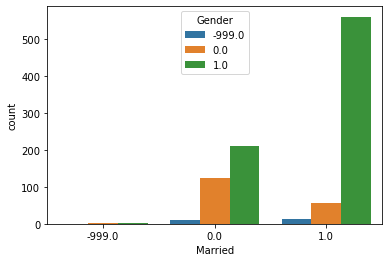

In [213]:
sns.countplot(df['Married'],hue = df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

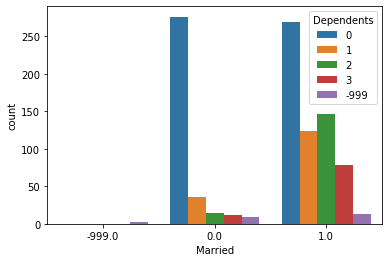

In [214]:
sns.countplot(df['Married'],hue = df['Dependents'])

In [243]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [244]:
cat_col= ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

ValueError: Could not interpret input 'L'

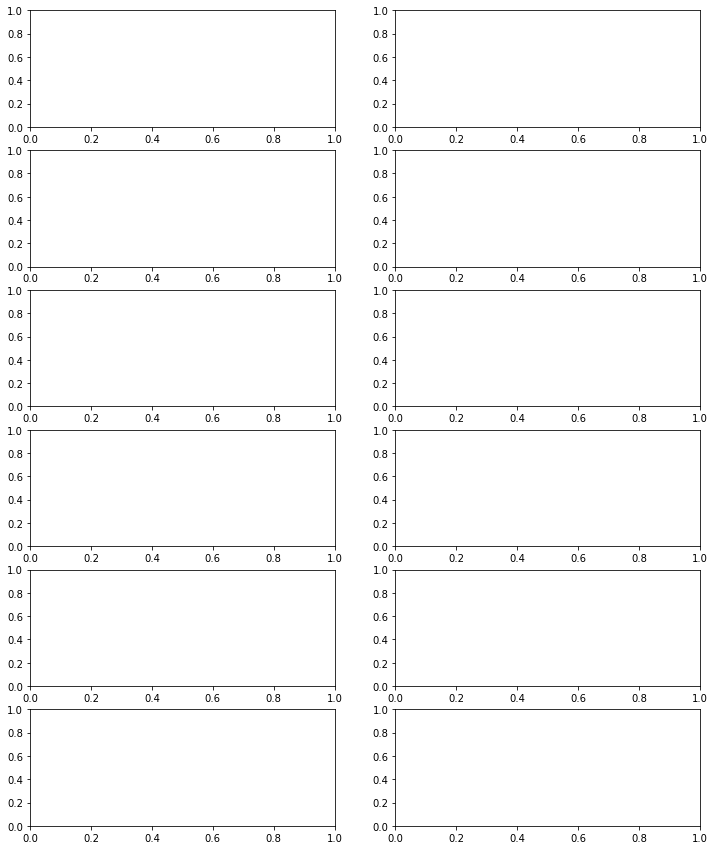

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(6,2,figsize=(12,15))
for idx,cat_col in enumerate(cat_col):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

In [221]:
train = df[:len(df_train)]
test1 = df[len(df_train):]
X = train.drop(['Loan_Status','Loan_ID'], axis = 1)
y= train['Loan_Status'].astype(int)
test_df = test1.drop(['Loan_Status','Loan_ID'], axis = 1)

In [222]:
X.shape, y.shape


((614, 11), (614,))

In [223]:
test.shape

(123,)

In [224]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [225]:
# cat_columns = [['Gender', 'Married', 'Dependents', 'Education',
#        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
# #        'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

In [226]:
from sklearn.model_selection import KFold, StratifiedKFold
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
kfold, scores, y_pred_totcb = StratifiedKFold(n_splits=5, shuffle=True, random_state=221), list(), []
for train, test in kfold.split(X, y):
    x_train, x_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
    model = CatBoostClassifier(random_state=27,  n_estimators=3000,
                               max_depth=7, verbose=500, learning_rate=0.102, eval_metric='AUC')
    model.fit(x_train, y_train, eval_set=(x_test, y_test))
    preds = model.predict_proba(x_test)[:,1]
    score = roc_auc_score(y_test, preds)
    scores.append(score)
    print(score)
    test_pred = model.predict_proba(test_df)[:,1]
    y_pred_totcb.append(test_pred)
print("Average: ", sum(scores)/len(scores))

0:	test: 0.6732198	best: 0.6732198 (0)	total: 8.43ms	remaining: 25.3s
500:	test: 0.6972136	best: 0.7348297 (10)	total: 2.29s	remaining: 11.4s
1000:	test: 0.7080495	best: 0.7348297 (10)	total: 4.68s	remaining: 9.35s
1500:	test: 0.7105263	best: 0.7348297 (10)	total: 7.09s	remaining: 7.08s
2000:	test: 0.7099071	best: 0.7348297 (10)	total: 9.65s	remaining: 4.82s
2500:	test: 0.7123839	best: 0.7348297 (10)	total: 12s	remaining: 2.39s
2999:	test: 0.7136223	best: 0.7348297 (10)	total: 14.3s	remaining: 0us

bestTest = 0.7348297214
bestIteration = 10

Shrink model to first 11 iterations.
0.7348297213622291
0:	test: 0.7495356	best: 0.7495356 (0)	total: 6.74ms	remaining: 20.2s
500:	test: 0.7325077	best: 0.7557276 (26)	total: 2.42s	remaining: 12.1s
1000:	test: 0.7300310	best: 0.7557276 (26)	total: 4.81s	remaining: 9.6s
1500:	test: 0.7287926	best: 0.7557276 (26)	total: 7.11s	remaining: 7.1s
2000:	test: 0.7287926	best: 0.7557276 (26)	total: 9.43s	remaining: 4.71s
2500:	test: 0.7281734	best: 0.7557276

<AxesSubplot:title={'center':'Feature Importance'}>

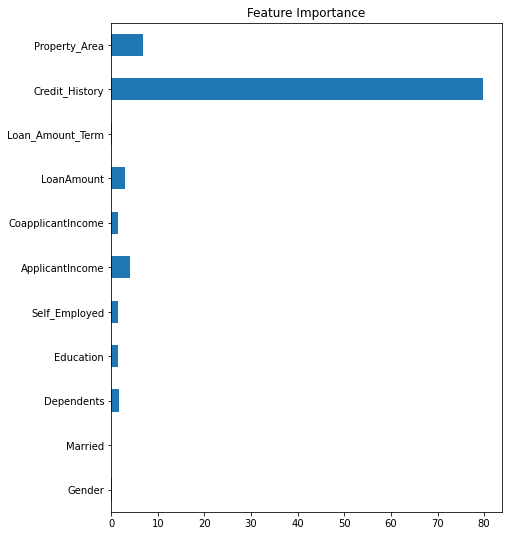

In [227]:
fea_imp = pd.Series(model.feature_importances_, index=X.columns)
fea_imp.plot.barh(figsize=(7, 9), title='Feature Importance')

In [228]:
np.mean(y_pred_totcb, 0)

array([0.71792394, 0.76969925, 0.75552349, 0.77180321, 0.5833165 ,
       0.75168919, 0.73122348, 0.16753342, 0.7856807 , 0.8431956 ,
       0.61636574, 0.81714632, 0.60412194, 0.33880487, 0.75788976,
       0.75592242, 0.7585519 , 0.80247314, 0.61701579, 0.71457108,
       0.75487563, 0.59776099, 0.6417041 , 0.69874468, 0.65256636,
       0.21854341, 0.75017085, 0.65149533, 0.74347359, 0.74143699,
       0.74478809, 0.7818279 , 0.79730818, 0.76497634, 0.7696205 ,
       0.18293855, 0.80394944, 0.74871711, 0.7196828 , 0.73433465,
       0.73271273, 0.68035368, 0.82263346, 0.71375748, 0.6333759 ,
       0.64626995, 0.71712348, 0.83297245, 0.74074245, 0.72676219,
       0.76329771, 0.769661  , 0.79834627, 0.77059192, 0.55138078,
       0.16006426, 0.65233632, 0.82575042, 0.214348  , 0.80124235,
       0.83944665, 0.73279751, 0.73757817, 0.22894816, 0.71223912,
       0.82877415, 0.24279678, 0.17428444, 0.7484327 , 0.21692349,
       0.76212135, 0.7404606 , 0.77970307, 0.68735336, 0.81656

In [229]:
sub = pd.read_csv('sample_sub.csv')

In [230]:
sub.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [231]:
sub['Loan_Status'] = np.mean(y_pred_totcb, 0)

In [232]:
sub.head()

,Loan_ID,Loan_Status
0,LP001015,0.717924
1,LP001022,0.769699
2,LP001031,0.755523
3,LP001035,0.771803
4,LP001051,0.583316


In [240]:
sub.to_csv('submissionFinal.csv', index=False)